In [8]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


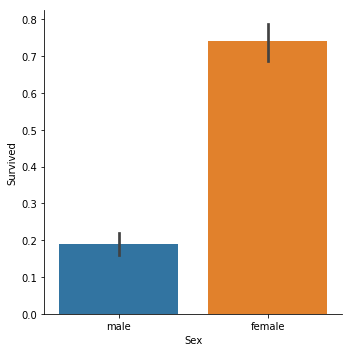

In [24]:
sns.catplot(x='Sex',y="Survived",data=titanic_df,kind="bar")

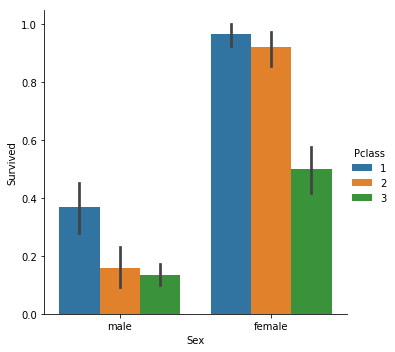

In [25]:
sns.catplot(x='Sex',y="Survived",hue="Pclass",data=titanic_df,kind="bar")

In [27]:
#In order to find the number of childrens on the ship,
#we create the following function.
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [28]:
titanic_df['Person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [29]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


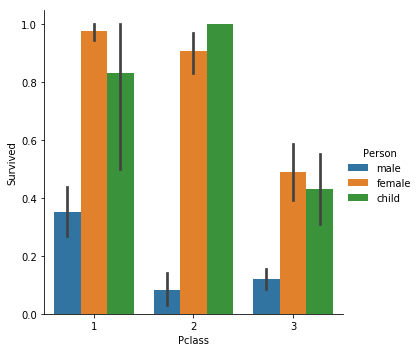

In [30]:
sns.catplot(x="Pclass",y="Survived",hue="Person",data=titanic_df,kind="bar")

Mean age of passengers on the ship is 29.699.


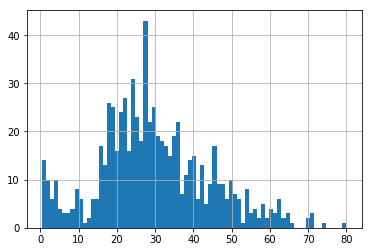

In [39]:
titanic_df['Age'].hist(bins=75)
mean = titanic_df['Age'].mean()
print(f'Mean age of passengers on the ship is {mean:.3f}.')

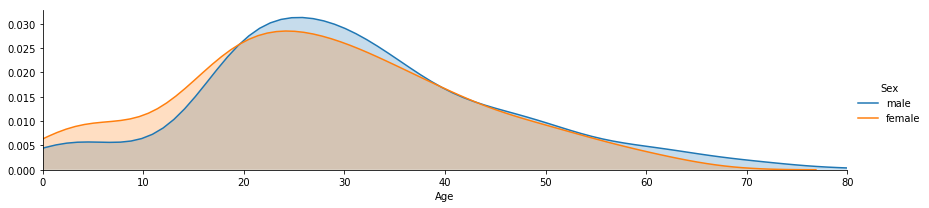

In [41]:
#Age distribution differentiated on the basis of Gender

fig = sns.FacetGrid(titanic_df,hue="Sex",aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)

oldest = titanic_df["Age"].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

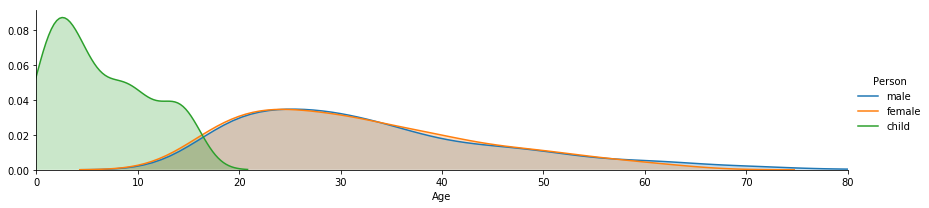

In [42]:
#Age distribution differentiated on the basis of type of Person

fig = sns.FacetGrid(titanic_df,hue="Person",aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)

oldest = titanic_df["Age"].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

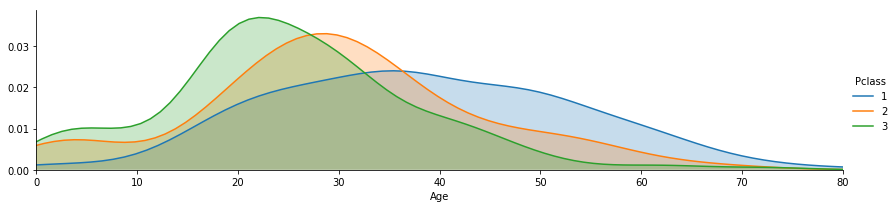

In [43]:
#Age distribution differentiated on the basis of Class

fig = sns.FacetGrid(titanic_df,hue="Pclass",aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)

oldest = titanic_df["Age"].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [44]:
deck = titanic_df["Cabin"].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

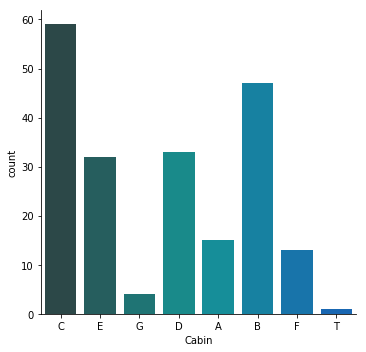

In [51]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)

cabin_df.columns = ["Cabin"]

sns.catplot("Cabin",data=cabin_df,palette="winter_d",kind="count")

In [52]:
cabin_df = cabin_df[cabin_df.Cabin != "T"]

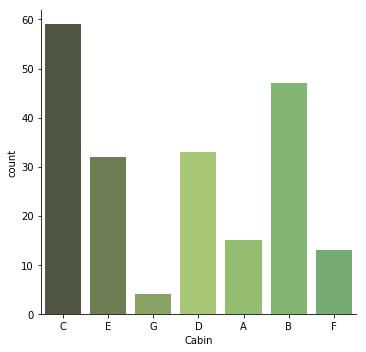

In [53]:
sns.catplot("Cabin",data=cabin_df,palette="summer_d",kind="count")

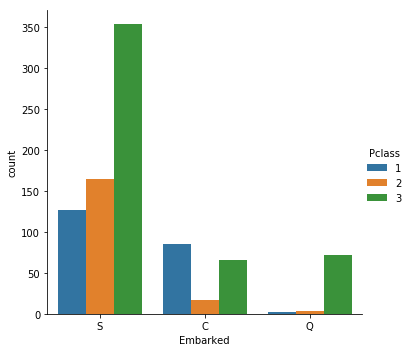

In [61]:
sns.catplot("Embarked",data=titanic_df,hue="Pclass",kind="count")

Inference: A lot of class 1 ticket buyers were from town 'S' and so were a majority of class 3 ticker buyers. The economy of town 'S' seems to be thriving at that time. Whereas from town Q, majority of ticket buyers have bought tickets of class 3. This 'might' help us understand the economic prosperity of town Q.

In [67]:
#if SibSp ie Sibling is 0 and Parch ie Parents and/or Children is 0 as well,
#then the passenger were all alone
titanic_df["Alone"] = titanic_df.SibSp = titanic_df.Parch

In [71]:
titanic_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,0,A/5 21171,7.2500,NaN,S,male,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,0,PC 17599,71.2833,C85,C,female,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,0,113803,53.1000,C123,S,female,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,1,1,349909,21.0750,NaN,S,child,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,2,2,347742,11.1333,NaN,S,female,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,0,0,237736,30.0708,NaN,C,child,0


In [72]:
titanic_df["Alone"].loc[titanic_df["Alone"] > 0] = 1
titanic_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,0,A/5 21171,7.2500,NaN,S,male,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,0,PC 17599,71.2833,C85,C,female,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,0,113803,53.1000,C123,S,female,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,1,1,349909,21.0750,NaN,S,child,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,2,2,347742,11.1333,NaN,S,female,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,0,0,237736,30.0708,NaN,C,child,0


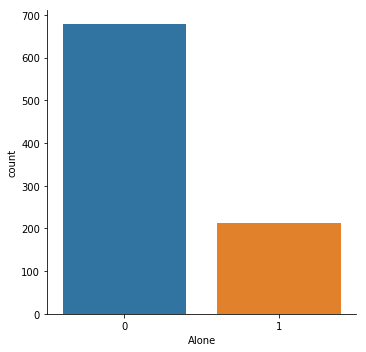

In [74]:
sns.catplot("Alone",data=titanic_df,kind="count")

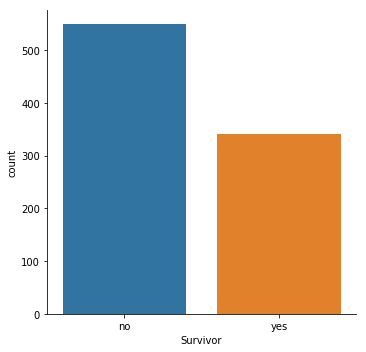

In [76]:
titanic_df["Survivor"] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.catplot("Survivor",data=titanic_df,kind="count")

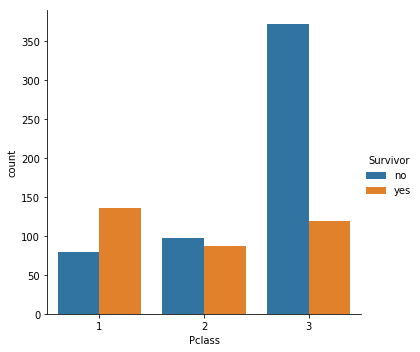

In [77]:
#In order to check whether the assumption that more of the class 3 passengers ended up losing their life,
# we do the following plot,
sns.catplot("Pclass",data=titanic_df,hue="Survivor",kind="count")

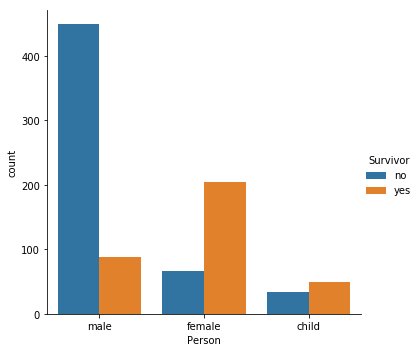

In [78]:
#Another assumption is that women and children were rescued first,
#Let us see its effects on survival rate 
sns.catplot("Person",data=titanic_df,hue="Survivor",kind="count")

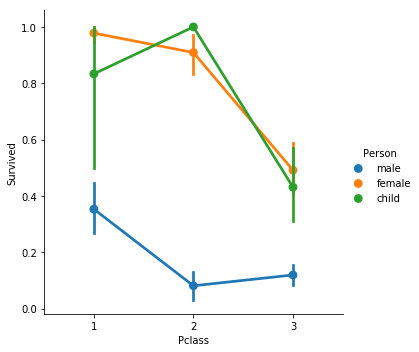

In [82]:
sns.catplot("Pclass","Survived",data=titanic_df,hue="Person",kind="point")

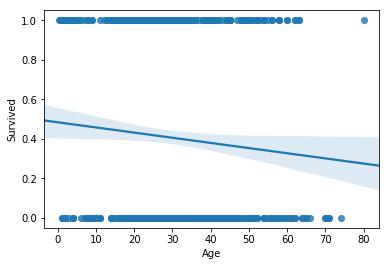

In [85]:
#Let us check the effect of age on the survival rate
sns.regplot("Age","Survived",data=titanic_df)

In [126]:
cabin_df["Survivor"] = titanic_df["Survivor"]
cabin_df.head()

/home/deekay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Cabin,Survivor
0,C,no
1,C,yes
2,E,yes
3,G,yes
4,C,no


/home/deekay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


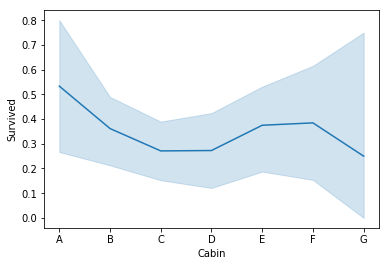

In [140]:
cabin_df["Survived"] = titanic_df["Survived"]
sns.lineplot("Cabin","Survived",data=cabin_df)

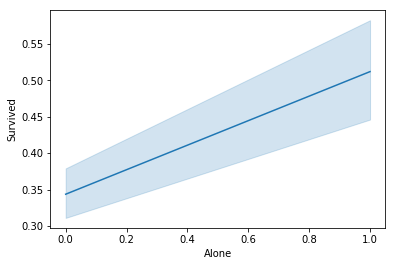

In [141]:
sns.lineplot("Alone","Survived",data=titanic_df)